In [46]:
#The libraries we need , and I'm using scikit-learn for data splitting and normalization to prepare the dataset
# scikit-learn also because the gradient descent and model training were implemented entirely from scratch as required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [47]:
#Getting the file from Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Intro to Machine Learning 4105/Housing.csv'
df = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [49]:
#All the functions needed for the problem

# The function to preprocess the utilities
def preprocess_data(df, features, target):
    df = df.copy()
    df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)
    X = df[features].values
    y = df[target].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

def normalize(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

#Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    return ((predictions - y) ** 2).mean() / 2

# Gradient Descent
def gradient_descent(X, y, alpha, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for _ in range(iterations):
        gradients = (1/m) * X.T @ (X @ theta - y)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history



In [50]:

#Training Function
def train_model(df, feature_cols, label_col, alpha=0.01, iterations=1500):
    X_train, X_test, y_train, y_test = preprocess_data(df, feature_cols, label_col)
    X_train, X_test = normalize(X_train, X_test)
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    theta, train_costs = gradient_descent(X_train, y_train, alpha, iterations)
    val_costs = [compute_cost(X_test, y_test, theta)] * iterations

    # Plot training and validation loss
    plt.plot(range(iterations), train_costs, label='Training Loss')
    plt.plot(range(iterations), val_costs, label='Validation Loss')
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Training vs Validation Loss ({len(feature_cols)} features)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Final Theta: {theta}")
    print(f"Final Training Cost: {train_costs[-1]}")
    print(f"Final Validation Cost: {val_costs[-1]}")
    return theta



=== Problem 1a ===


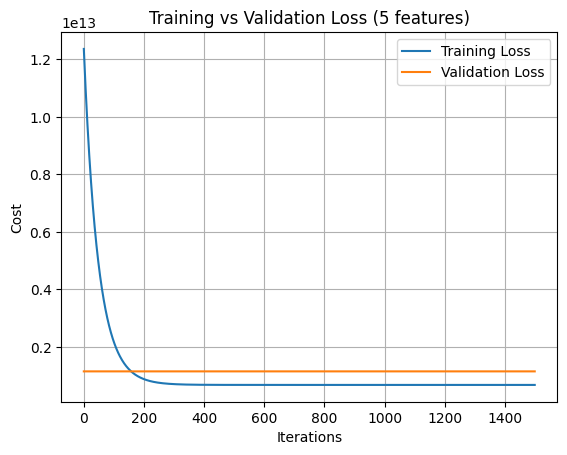

Final Theta: [4706526.05028661  680048.07520622  113023.11411737  565385.78563403
  424325.49615291  288356.21052377]
Final Training Cost: 675004106825.4813
Final Validation Cost: 1146362236398.1162


In [51]:
# Problem 1a
features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
print("=== Problem 1a ===")
theta_1a = train_model(df, features_1a, 'price', alpha=0.01, iterations=1500)



=== Problem 1b ===


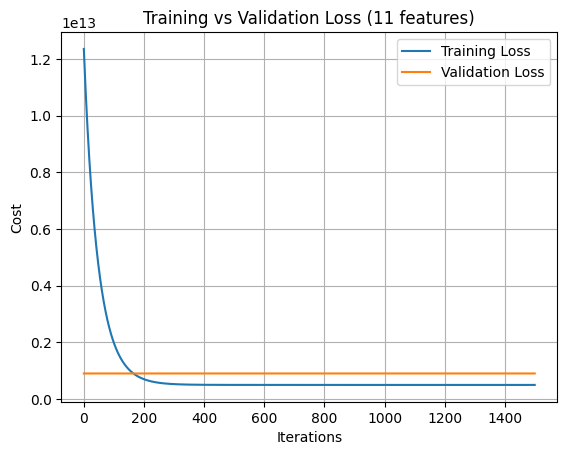

Final Theta: [4706526.05028661  523218.39153482   58865.22179247  529011.20826228
  365543.47218995  144247.55655105   93544.35622839  208224.40214885
  155952.29156802  373141.40084965  211289.23040792  269594.15748996]
Final Training Cost: 496240574475.431
Final Validation Cost: 900365658818.2056


In [52]:
#Problem 1b
# Here we do the encoding for all object columns so we can reference the exact dummy variable names
df_encoded = pd.get_dummies(df, drop_first=True)
features_1b = ['area', 'bedrooms', 'bathrooms', 'stories',
               'mainroad_yes', 'guestroom_yes', 'basement_yes',
               'hotwaterheating_yes', 'airconditioning_yes',
               'parking', 'prefarea_yes']

print("\n=== Problem 1b ===")
theta_1b = train_model(df_encoded, features_1b, 'price', alpha=0.01, iterations=1500)


=== Problem 2a: Scaling on Problem 1a (5 features) ===

--- Standardization ---


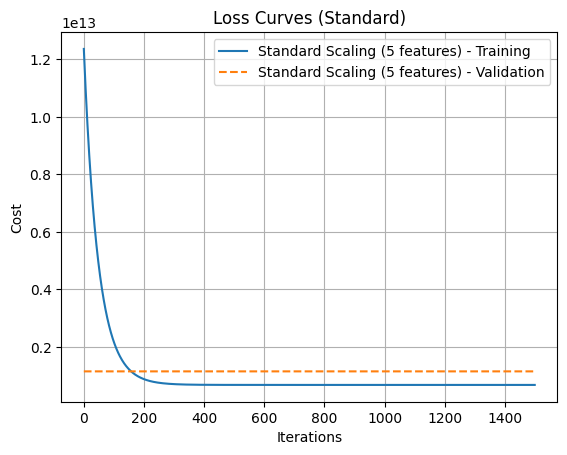

Standard Final Training Cost: 675004106825.4813
Standard Final Validation Cost: 1146362236398.1162

--- Normalization ---


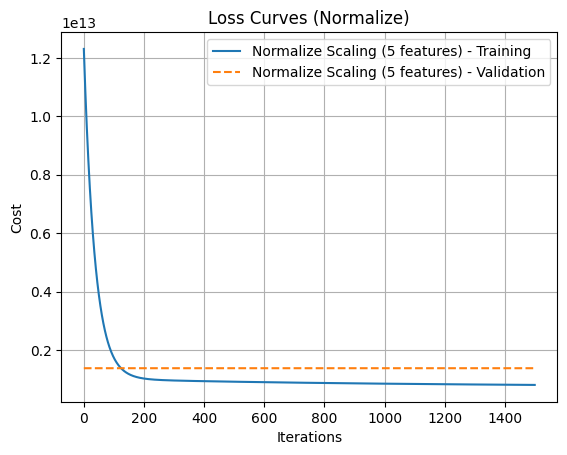

Normalize Final Training Cost: 807157465487.4497
Normalize Final Validation Cost: 1378946626927.7117

=== Problem 2b: Scaling on Problem 1b (11 features incl. categorical) ===

--- Standardization ---


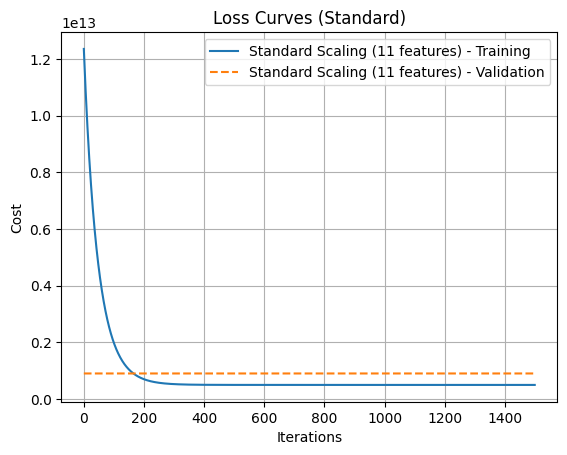

Standard Final Training Cost: 496240574475.431
Standard Final Validation Cost: 900365658818.2056

--- Normalization ---


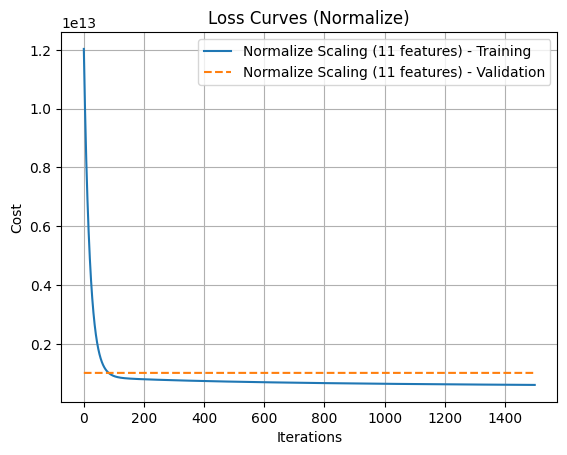

Normalize Final Training Cost: 601914625720.8577
Normalize Final Validation Cost: 1011379326541.9672


In [53]:
# === Scaling Utilities for Problem 2 ===

def normalize_input(X_train, X_test):
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    min_vals = X_train.min(axis=0)
    max_vals = X_train.max(axis=0)
    # Avoid division by zero if a feature has a constant value
    max_vals[max_vals == min_vals] = min_vals[max_vals == min_vals] + 1e-8
    X_train_norm = (X_train - min_vals) / (max_vals - min_vals)
    X_test_norm = (X_test - min_vals) / (max_vals - min_vals)
    return X_train_norm, X_test_norm

def standardize_input(X_train, X_test):
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    mean_vals = X_train.mean(axis=0)
    std_vals = X_train.std(axis=0)
    # Avoid division by zero if a feature has a constant value
    std_vals[std_vals == 0] = 1e-8
    X_train_std = (X_train - mean_vals) / std_vals
    X_test_std = (X_test - mean_vals) / std_vals
    return X_train_std, X_test_std


# === Gradient Descent (already implemented earlier)
# def compute_cost(X, y, theta)
# def gradient_descent(X, y, alpha, iterations)

# === Training Function with Scaling Option ===
def train_scaled_model(df, feature_cols, label_col, scale_type='standard', alpha=0.01, iterations=1500):
    X_train, X_test, y_train, y_test = preprocess_data(df, feature_cols, label_col)

    if scale_type == 'standard':
        X_train, X_test = standardize_input(X_train, X_test)
    elif scale_type == 'normalize':
        X_train, X_test = normalize_input(X_train, X_test)
    else:
        raise ValueError("scale_type must be either 'standard' or 'normalize'")

    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    theta, train_costs = gradient_descent(X_train, y_train, alpha, iterations)

    # Calculate validation costs for plotting
    val_costs = [compute_cost(X_test, y_test, theta)] * iterations


    # Plot training and validation loss
    label = f"{scale_type.capitalize()} Scaling ({len(feature_cols)} features)"
    plt.plot(range(iterations), train_costs, label=f'{label} - Training')
    plt.plot(range(iterations), val_costs, '--', label=f'{label} - Validation')
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Loss Curves ({scale_type.capitalize()})")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{scale_type.capitalize()} Final Training Cost: {train_costs[-1]}")
    print(f"{scale_type.capitalize()} Final Validation Cost: {val_costs[-1]}")
    return theta

# === Problem 2a: Repeat Problem 1a with Scaling ===
print("\n=== Problem 2a: Scaling on Problem 1a (5 features) ===")
features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

print("\n--- Standardization ---")
theta_2a_std = train_scaled_model(df, features_1a, 'price', scale_type='standard', alpha=0.01, iterations=1500)

print("\n--- Normalization ---")
theta_2a_norm = train_scaled_model(df, features_1a, 'price', scale_type='normalize', alpha=0.01, iterations=1500)

# === Problem 2b: Repeat Problem 1b with Scaling ===
print("\n=== Problem 2b: Scaling on Problem 1b (11 features incl. categorical) ===")

# Make sure you reset df_encoded correctly and convert boolean columns to numeric
df_encoded = pd.get_dummies(df.copy(), drop_first=True)
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)


# Define matching feature columns
features_1b = ['area', 'bedrooms', 'bathrooms', 'stories',
               'mainroad_yes', 'guestroom_yes', 'basement_yes',
               'hotwaterheating_yes', 'airconditioning_yes',
               'parking', 'prefarea_yes']

print("\n--- Standardization ---")
theta_2b_std = train_scaled_model(df_encoded, features_1b, 'price', scale_type='standard', alpha=0.01, iterations=1500)

print("\n--- Normalization ---")
theta_2b_norm = train_scaled_model(df_encoded, features_1b, 'price', scale_type='normalize', alpha=0.01, iterations=1500)

In [54]:
# === Gradient Descent with L2 Regularization ===
def gradient_descent_with_penalty(X, y, alpha, iterations, lambda_):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradients = (1/m) * (X.T @ errors)

        # Apply L2 penalty (except for bias term θ₀)
        penalty = (lambda_ / m) * np.copy(theta)
        penalty[0] = 0  # don't regularize bias
        theta -= alpha * (gradients + penalty)

        cost = ((errors ** 2).mean()) / 2  # normal cost for plotting
        cost_history.append(cost)

    return theta, cost_history

# === Training Function with Regularization ===
def train_scaled_model_with_penalty(df, feature_cols, label_col, scale_type='standard', alpha=0.01, iterations=1500, lambda_=1.0):
    X_train, X_test, y_train, y_test = preprocess_data(df, feature_cols, label_col)

    if scale_type == 'standard':
        X_train, X_test = standardize_input(X_train, X_test)
    elif scale_type == 'normalize':
        X_train, X_test = normalize_input(X_train, X_test)
    else:
        raise ValueError("scale_type must be either 'standard' or 'normalize'")

    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    theta, train_costs = gradient_descent_with_penalty(X_train, y_train, alpha, iterations, lambda_)
    val_costs = [compute_cost(X_test, y_test, theta)] * iterations

    # Plotting
    label = f"{scale_type.capitalize()} + L2 (λ={lambda_})"
    plt.plot(range(iterations), train_costs, label=f'{label} - Training')
    plt.plot(range(iterations), val_costs, '--', label=f'{label} - Validation')
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Loss with Regularization - {len(feature_cols)} Features")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{label} Final Training Cost: {train_costs[-1]}")
    print(f"{label} Final Validation Cost: {val_costs[-1]}")
    return theta



=== Problem 3a: Problem 2a with L2 Penalty ===


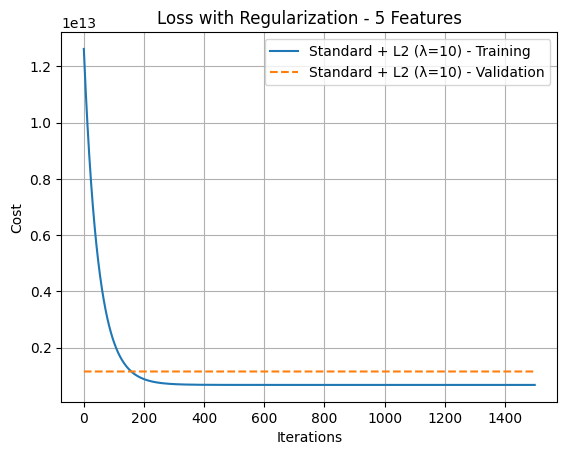

Standard + L2 (λ=10) Final Training Cost: 675203062480.9794
Standard + L2 (λ=10) Final Validation Cost: 1152229746465.1082

=== Problem 3b: Problem 2b with L2 Penalty ===


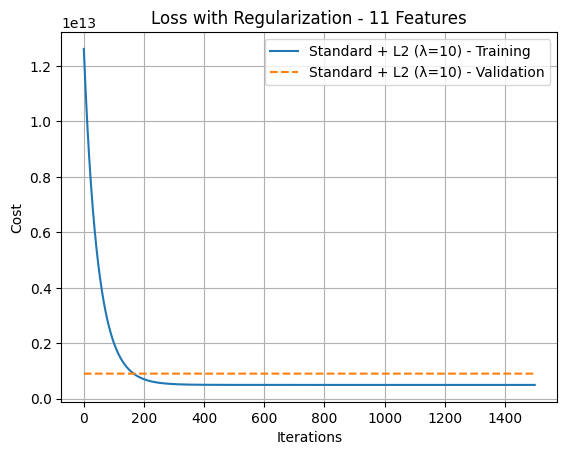

Standard + L2 (λ=10) Final Training Cost: 496427092773.2941
Standard + L2 (λ=10) Final Validation Cost: 903598482398.7708


In [55]:
# === Problem 3a ===
print("\n=== Problem 3a: Problem 2a with L2 Penalty ===")
features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
theta_3a = train_scaled_model_with_penalty(df, features_1a, 'price',
                                           scale_type='standard',  # or 'normalize' based on your best from 2a
                                           alpha=0.01,
                                           iterations=1500,
                                           lambda_=10)

# === Problem 3b ===
print("\n=== Problem 3b: Problem 2b with L2 Penalty ===")
df_encoded = pd.get_dummies(df.copy(), drop_first=True)
# Convert boolean columns to integer type (0 or 1)
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

features_1b = ['area', 'bedrooms', 'bathrooms', 'stories',
               'mainroad_yes', 'guestroom_yes', 'basement_yes',
               'hotwaterheating_yes', 'airconditioning_yes',
               'parking', 'prefarea_yes']
theta_3b = train_scaled_model_with_penalty(df_encoded, features_1b, 'price',
                                           scale_type='standard',  # or 'normalize' based on your best from 2b
                                           alpha=0.01,
                                           iterations=1500,
                                           lambda_=10)